In [1]:
!git clone https://github.com/bdi2357/TreeModelVis.git

Cloning into 'TreeModelVis'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 156 (delta 74), reused 115 (delta 35), pack-reused 0
Receiving objects: 100% (156/156), 9.30 MiB | 11.73 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [2]:
!ls TreeModelVis/

data  graphical_output	LICENSE  README.md  requirements.txt  setup.py	source	tests


In [3]:
!cat TreeModelVis/requirements.txt

graphviz==0.20.1
numpy==1.26.3
pandas==2.2.0
scikit_learn==1.4.0

In [4]:
!python -m venv myenv

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/myenv/bin/python3



In [5]:
!cat TreeModelVis/requirements.txt

graphviz==0.20.1
numpy==1.26.3
pandas==2.2.0
scikit_learn==1.4.0

In [6]:
#!pip install --force-reinstall numpy==1.26.3

In [7]:
#!pip install --force-reinstall scikit_learn

In [8]:
import sys
from sklearn.model_selection import train_test_split
import pandas as pd
import os

sys.path.insert(0, os.path.abspath(os.path.join("TreeModelVis", 'source')))

from TreeModel import TreeModel

In [9]:
!ls TreeModelVis/data/

AsthmaDiseasePrediction.csv  diabetes.csv  HealthInsuranceCrossSellPrediction  smoking.csv


In [10]:
file_path = 'TreeModelVis/data/diabetes.csv'
df_diabetes = pd.read_csv(file_path)
X_diabetes = df_diabetes.drop('Outcome', axis=1)
y_diabetes = df_diabetes['Outcome']

In [11]:
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
            X_diabetes, y_diabetes, test_size=0.2, random_state=42)

In [12]:
class_names_diabetes = ['No', 'Yes']

In [13]:
tree_model = TreeModel(
            model_type='decision_tree',
            model_params={'max_depth': 3},
            X_train=X_train_diabetes,
            y_train=y_train_diabetes,
            class_names=class_names_diabetes
        )

leaves
 {3: {'errors': 1, 'total': 124}, 7: {'errors': 58, 'total': 135}, 10: {'errors': 5, 'total': 36}, 11: {'errors': 11, 'total': 25}, 13: {'errors': 40, 'total': 108}, 4: {'errors': 16, 'total': 97}, 14: {'errors': 5, 'total': 55}, 6: {'errors': 1, 'total': 34}}


In [14]:
filename = os.path.join("graphical_output", "test_TreeModel_diabetes")
output_path = tree_model.custom_plot_tree(filename=filename)
print(output_path)

0 [label=<Glucose &le; 127.5<br/>614<br/>[401, 213]<br/>No>, fillcolor="#f3c4a2"] ;
after
0 [label=<Glucose &le; 127.5>, fillcolor=white, original_fillcolor="#f3c4a2"] ;
############################################
1 [label=<Age &le; 28.5<br/>390<br/>[314, 76]<br/>No>, fillcolor="#eb9f69"] ;
after
1 [label=<Age &le; 28.5>, fillcolor=white, original_fillcolor="#eb9f69"] ;
############################################
2 [label=<BMI &le; 30.95<br/>221<br/>[204, 17]<br/>No>, fillcolor="#e78c49"] ;
after
2 [label=<BMI &le; 30.95>, fillcolor=white, original_fillcolor="#e78c49"] ;
############################################
leaf
3 [label=<124<br/>[123, 1]<br/>No>, fillcolor="#e5823b"] ;
leaf_AFTER
3 [label=<No<br/>
Error Rate: 0.01<br/>
 % of the total:20.20%>, fillcolor="#e5823b"] ;
leaf
4 [label=<97<br/>[81, 16]<br/>No>, fillcolor="#ea9a60"] ;
leaf_AFTER
4 [label=<No<br/>
Error Rate: 0.16<br/>
 % of the total:15.80%>, fillcolor="#ea9a60"] ;
5 [label=<BMI &le; 26.35<br/>169<br/>[110, 59]<br/

In [15]:
from IPython.display import display


In [16]:
from tree_visualizer import visualize_decision_tree_with_errors
from graphviz import Source

In [17]:
dot = visualize_decision_tree_with_errors(tree_model, X_test_diabetes, y_test_diabetes, feature_names = list(X_diabetes.columns), model_type = "decision_tree", class_names = class_names_diabetes)

graph = Source(dot)

tree_model  11
before
0 [label=<Glucose &le; 127.5<br/><br/><br/><br/>class = No>, fillcolor="#f3c4a2"] ;
after
0 [label=<Glucose &le; 127.5>, fillcolor="#f3c4a2"] ;
before
1 [label=<Age &le; 28.5<br/><br/><br/><br/>class = No>, fillcolor="#eb9f69"] ;
after
1 [label=<Age &le; 28.5>, fillcolor="#eb9f69"] ;
before
2 [label=<BMI &le; 30.95<br/><br/><br/><br/>class = No>, fillcolor="#e78c49"] ;
after
2 [label=<BMI &le; 30.95>, fillcolor="#e78c49"] ;
before
3 [label=<<br/><br/><br/>class = No>, fillcolor="#e5823b"] ;
leaf
3 [label=<<br/>class = No>, fillcolor="#e5823b"] ;
before
4 [label=<<br/><br/><br/>class = No>, fillcolor="#ea9a60"] ;
leaf
4 [label=<<br/>class = No>, fillcolor="#ea9a60"] ;
before
5 [label=<BMI &le; 26.35<br/><br/><br/><br/>class = No>, fillcolor="#f3c5a3"] ;
after
5 [label=<BMI &le; 26.35>, fillcolor="#f3c5a3"] ;
before
6 [label=<<br/><br/><br/>class = No>, fillcolor="#e6853f"] ;
leaf
6 [label=<<br/>class = No>, fillcolor="#e6853f"] ;
before
7 [label=<<br/><br/><br/>cla

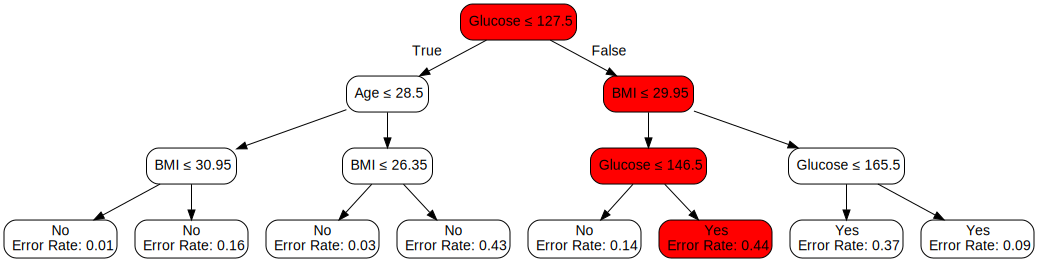

In [18]:
display(graph)

In [19]:
from tree_visualizer import visualize_decision_tree_with_nodes_large_error

In [20]:
dot, paths = visualize_decision_tree_with_nodes_large_error(tree_model, X_test_diabetes, y_test_diabetes,feature_names=X_diabetes.columns.tolist(),class_names=['No', 'Yes'], max_error_rate=0.4)

comapre
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
leaf
3 [label=<<br/>class = No>, fillcolor="#e5823b"] ;
3
##################################################
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
False
True
1
27
leaf
4 [label=<<br/>class = No>, fillcolor="#ea9a60"] ;
4
##################################################
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
False
True
5
23
leaf
6 [label=<<br/>class = No>, fillcolor="#e6853f"] ;
6
##################################################
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
False
True
1
7
leaf
7 [label=<<br/>class = No>, fillcolor="#f9e0ce"] ;
7
##################################################
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
False
True
11
38
leaf
10 [label=<<br/>class = No>, fillcolor="#e99559"] ;
10
################################

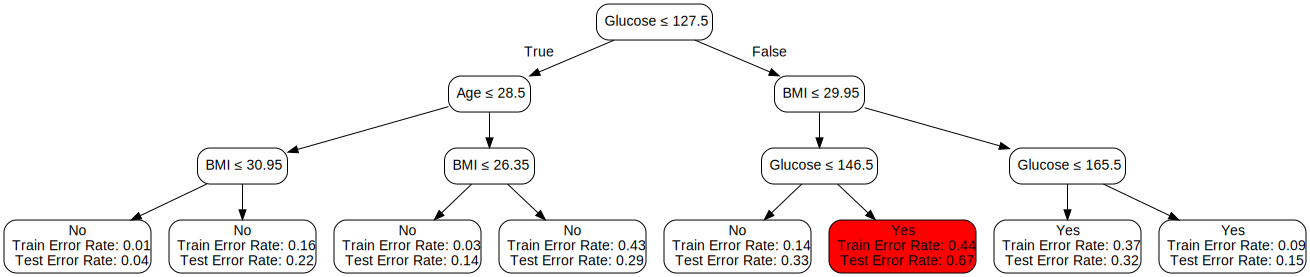

In [21]:
graph = Source(dot)
display(graph)

In [22]:
dot, paths = visualize_decision_tree_with_nodes_large_error(tree_model, X_test_diabetes, y_test_diabetes,feature_names=X_diabetes.columns.tolist(),class_names=['No', 'Yes'], max_error_rate=0.1, relative=True)

comapre
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
leaf
3 [label=<<br/>class = No>, fillcolor="#e5823b"] ;
3
##################################################
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
False
True
1
27
leaf
4 [label=<<br/>class = No>, fillcolor="#ea9a60"] ;
4
##################################################
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
False
True
5
23
leaf
6 [label=<<br/>class = No>, fillcolor="#e6853f"] ;
6
##################################################
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
False
True
1
7
line_err
6 [label=<No<br/>
Train Error Rate: 0.03<br/>
Test Error Rate: 0.14>, fillcolor=red, original_fillcolor="#e6853f"] ;
leaf
7 [label=<<br/>class = No>, fillcolor="#f9e0ce"] ;
7
##################################################
dict_keys([3, 7, 10, 11, 13, 4, 14, 6])
dict_keys([3, 7, 10, 11

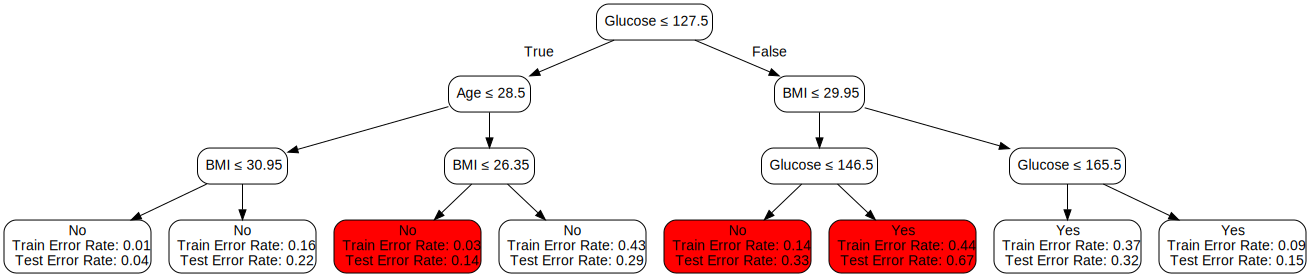

In [23]:
graph = Source(dot)
display(graph)

In [24]:
from tree_visualizer import visualize_decision_tree_with_sample_deviation

In [25]:
dot, paths = visualize_decision_tree_with_sample_deviation(tree_model, X_test_diabetes, y_test_diabetes,feature_names=X_diabetes.columns.tolist(),class_names=['No', 'Yes'], max_error_rate=0.15)

leaf
3 [label=<<br/>class = No>, fillcolor="#e5823b"] ;
leaf
4 [label=<<br/>class = No>, fillcolor="#ea9a60"] ;
leaf
6 [label=<<br/>class = No>, fillcolor="#e6853f"] ;
line_err
6 [label=<No<br/>Train % of the total:5.54%<br/>Test % of the total:4.55%>, fillcolor=purple, original_fillcolor="#e6853f"] ;
leaf
7 [label=<<br/>class = No>, fillcolor="#f9e0ce"] ;
leaf
10 [label=<<br/>class = No>, fillcolor="#e99559"] ;
leaf
11 [label=<<br/>class = Yes>, fillcolor="#d5eaf9"] ;
leaf
13 [label=<<br/>class = Yes>, fillcolor="#add7f4"] ;
leaf
14 [label=<<br/>class = Yes>, fillcolor="#4da7e8"] ;
before
0 [label=<Glucose &le; 127.5<br/><br/><br/><br/>class = No>, fillcolor="#f3c4a2"] ;
after
0 [label=<Glucose &le; 127.5>, fillcolor="#f3c4a2"] ;
before
1 [label=<Age &le; 28.5<br/><br/><br/><br/>class = No>, fillcolor="#eb9f69"] ;
after
1 [label=<Age &le; 28.5>, fillcolor="#eb9f69"] ;
before
2 [label=<BMI &le; 30.95<br/><br/><br/><br/>class = No>, fillcolor="#e78c49"] ;
after
2 [label=<BMI &le; 30.95>

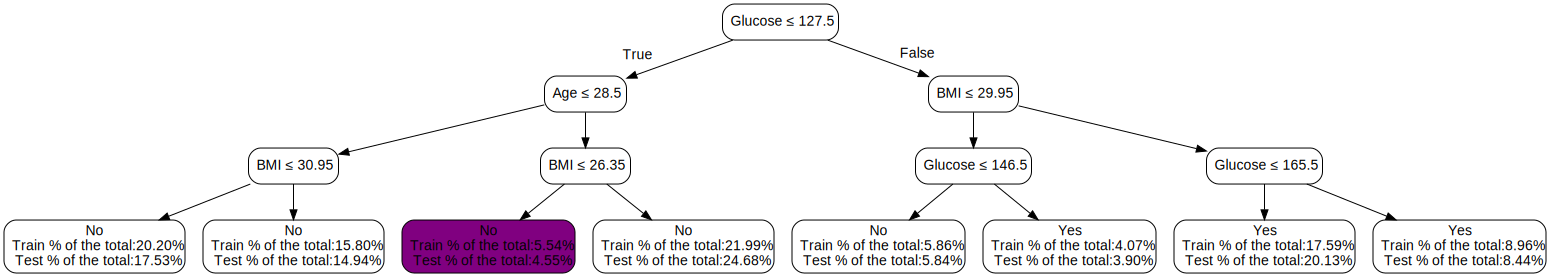

In [26]:
graph = Source(dot)
display(graph)